#### Importing Libraries

In [1]:
# Import python libraries 

import pandas as pd #for data frame
import numpy as np  #for numeric calulation
import seaborn as sns #for Visualization
import matplotlib.pyplot as plt #for Visualization
import pickle
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Collection

In [2]:
# Import data 'Flight Price Prediction.csv' using pandas.

flightdf = pd.read_csv(r"/kaggle/input/flight-dataset/Clean_Dataset.csv")
flightdf

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Data Exploration

In [3]:
flightdf.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# display the column names 

flightdf.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
#display the number of rows and columns

flightdf.shape


(300153, 12)

In [6]:
flightdf.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [7]:
flightdf.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
#Displaying the first five rows of the dataset

flightdf.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
unique_counts = flightdf.nunique()
print(unique_counts)


Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64


# Data Cleaning

In [10]:
#Dropping the column "Unnamed: 0"

flightdf.drop('Unnamed: 0', axis = 1, inplace= True)


In [11]:
flightdf.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [12]:
#Removing the 8 missing values in the price column
flightdf.dropna(subset=['price'], inplace=True)

# Data Visualization

#### Flight Prices by Class:

/tmp/ipykernel_47/1263381029.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='price', data=flightdf, ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


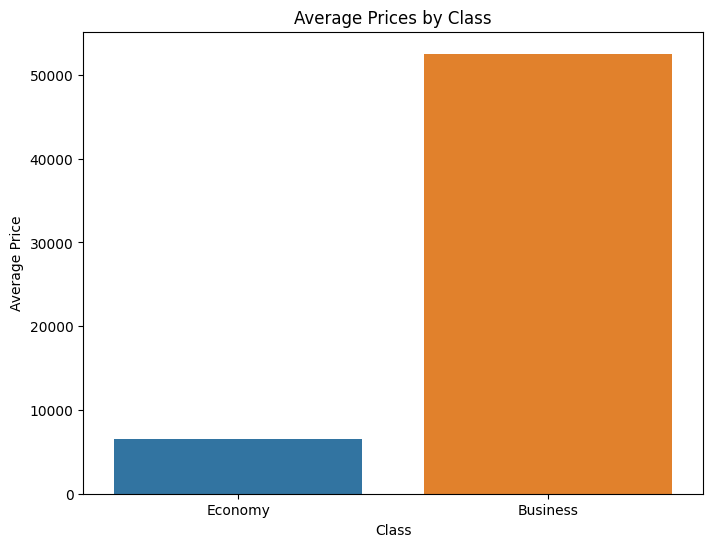

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='price', data=flightdf, ci=None)
plt.title('Average Prices by Class')
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.show()


# Variation in prices as per the class

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

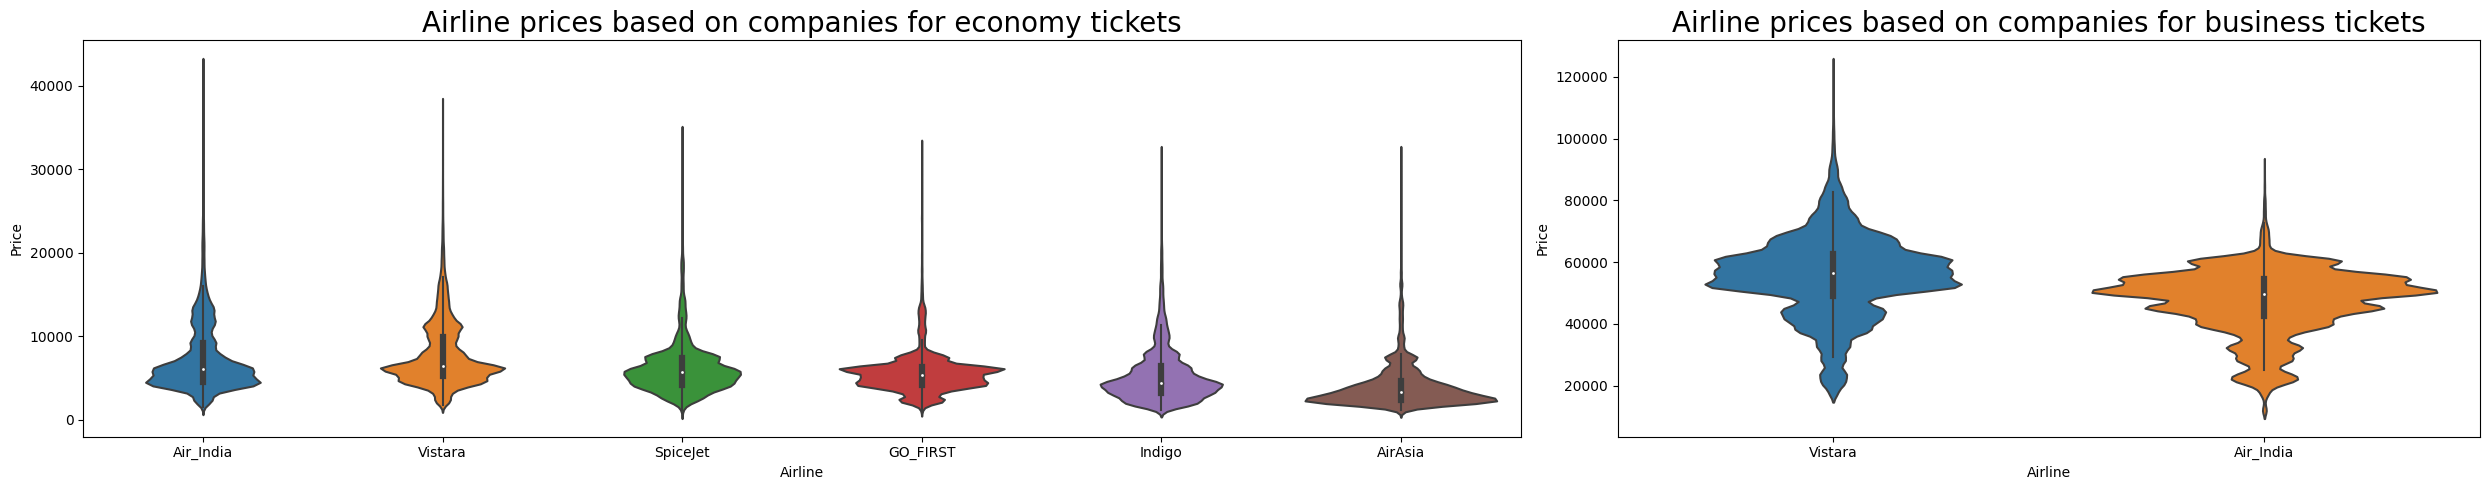

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_airline_prices(data, ticket_class, ax):
    filtered_data = data.loc[data["class"] == ticket_class].sort_values("price", ascending=False)
    sns.violinplot(y="price", x="airline", data=filtered_data, kind="boxen", ax=ax)
    ax.set_title(f"Airline prices based on companies for {ticket_class.lower()} tickets", fontsize=20)
    ax.set_xlabel('Airline')
    ax.set_ylabel('Price')

fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

plot_airline_prices(flightdf, 'Economy', axs[0])
plot_airline_prices(flightdf, 'Business', axs[1])

plt.tight_layout()
plt.show()


# Price variation by Airline

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


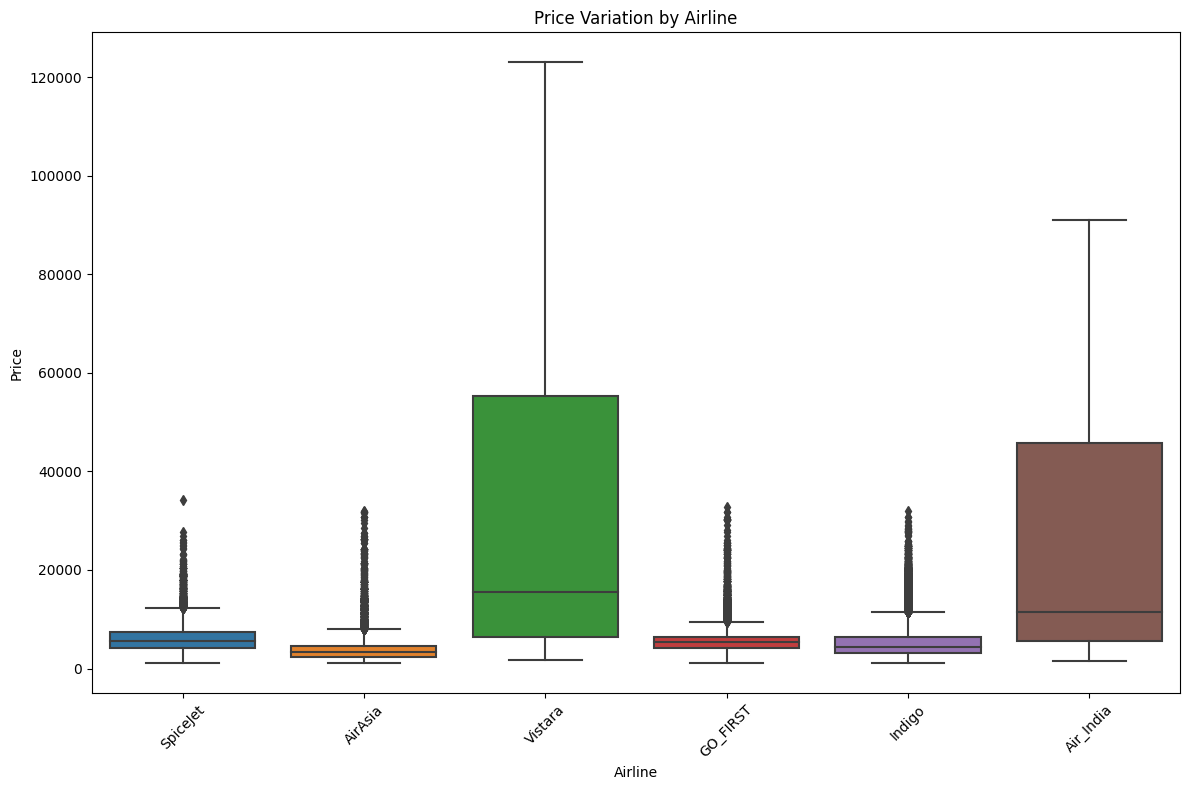

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='airline', y='price', data=flightdf)
plt.title('Price Variation by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Price Variation based on the departure time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

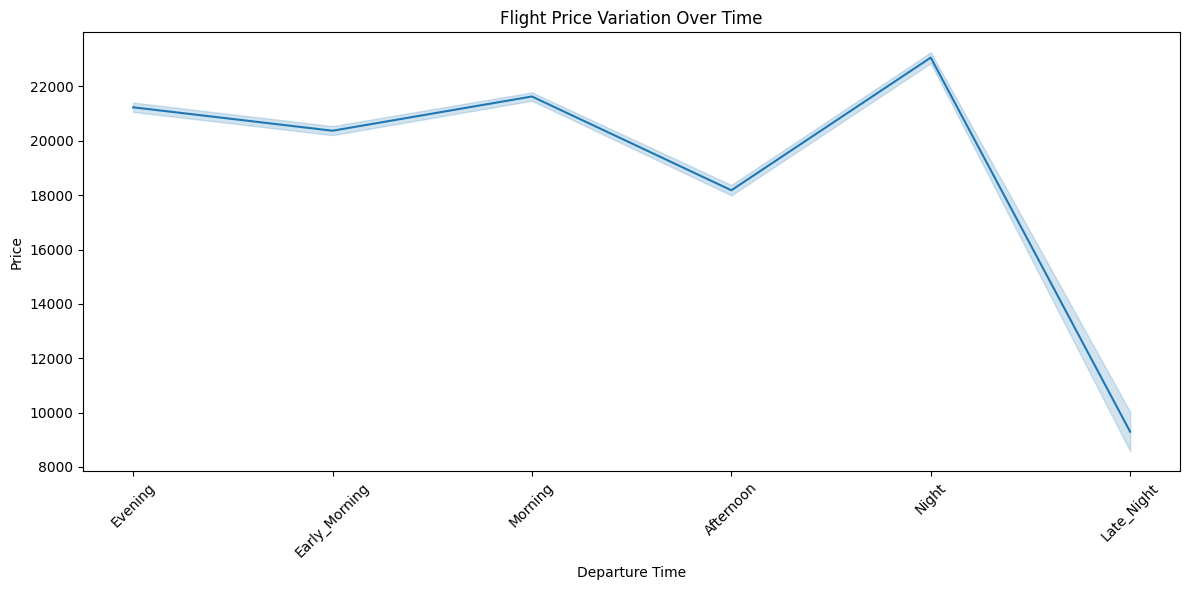

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='departure_time', y='price', data=flightdf)
plt.title('Flight Price Variation Over Time')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='days_left', ylabel='price'>

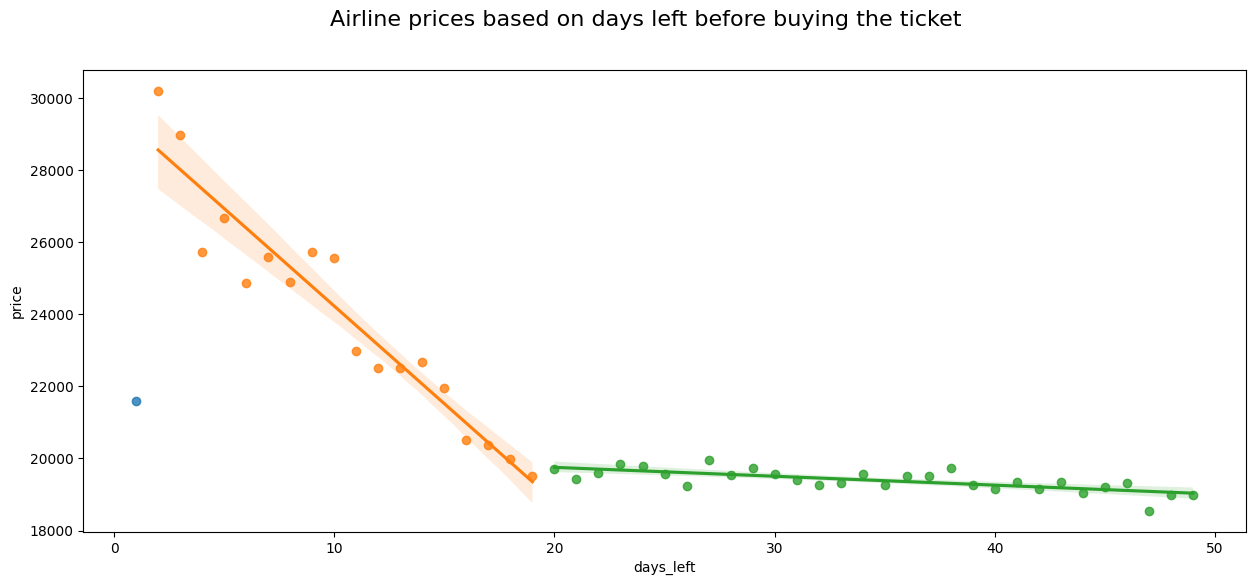

In [17]:
flightdf_temp = flightdf.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=flightdf_temp.loc[flightdf_temp["days_left"]==1].days_left, y=flightdf_temp.loc[flightdf_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=flightdf_temp.loc[(flightdf_temp["days_left"]>1)&(flightdf_temp["days_left"]<20)].days_left, y=flightdf_temp.loc[(flightdf_temp["days_left"]>1)&(flightdf_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=flightdf_temp.loc[flightdf_temp["days_left"]>=20].days_left, y=flightdf_temp.loc[flightdf_temp["days_left"]>=20].price, fit_reg=True, ax=ax)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

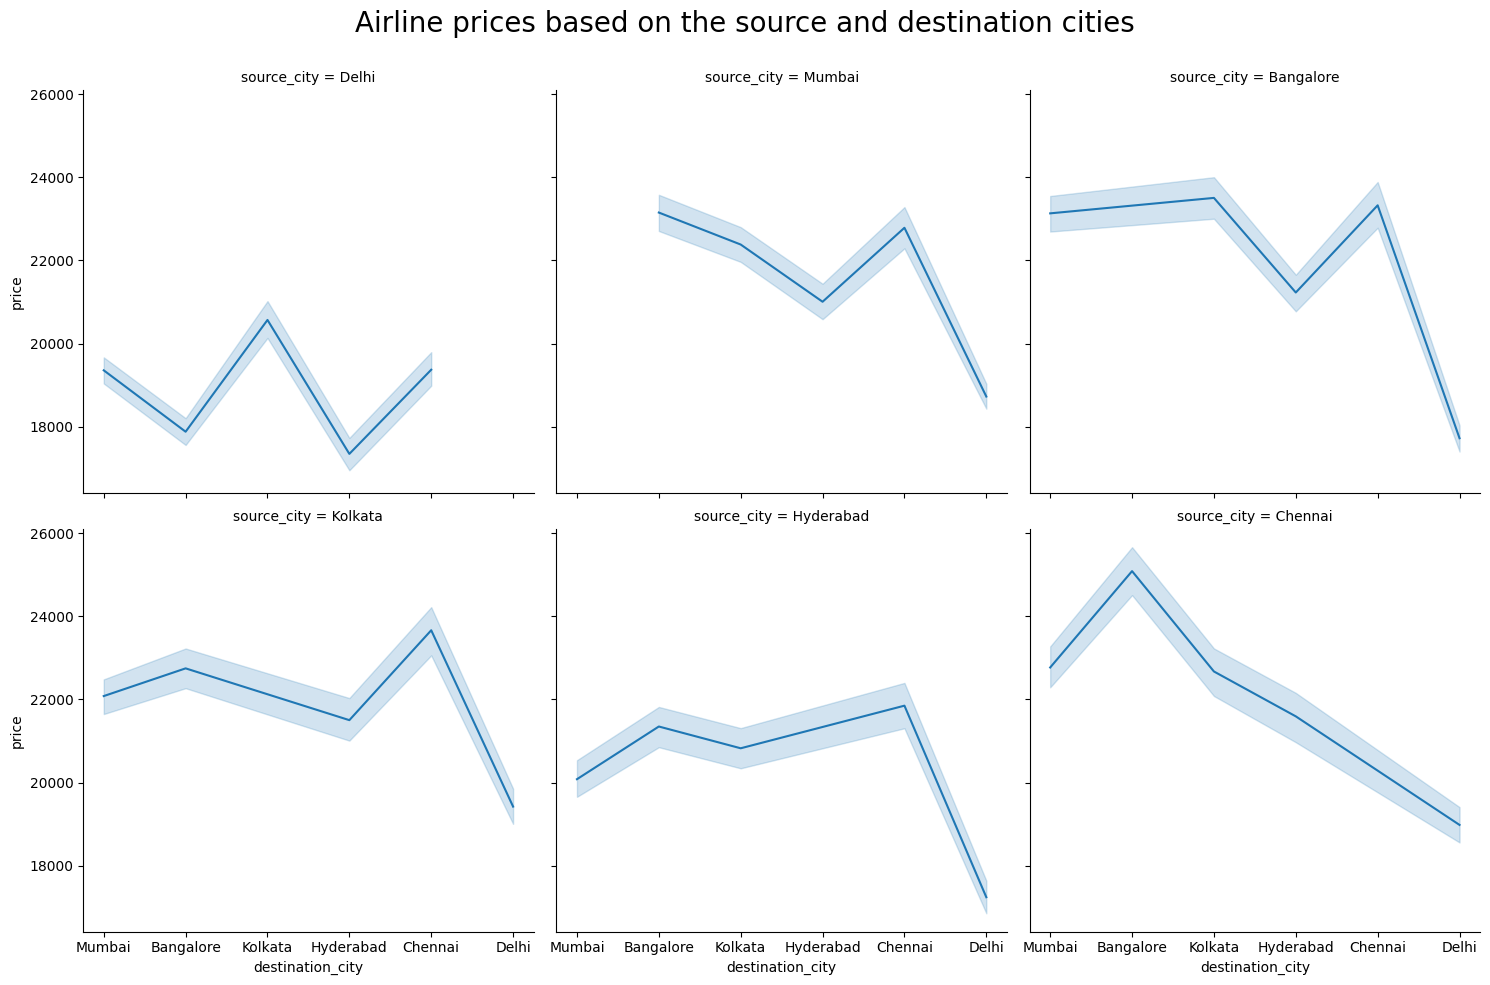

In [18]:
import seaborn as sns

plot = sns.relplot(
    col="source_city",
    y="price",
    kind="line",
    x="destination_city",
    data=flightdf,
    col_wrap=3
)
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('Airline prices based on the source and destination cities', fontsize=20)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

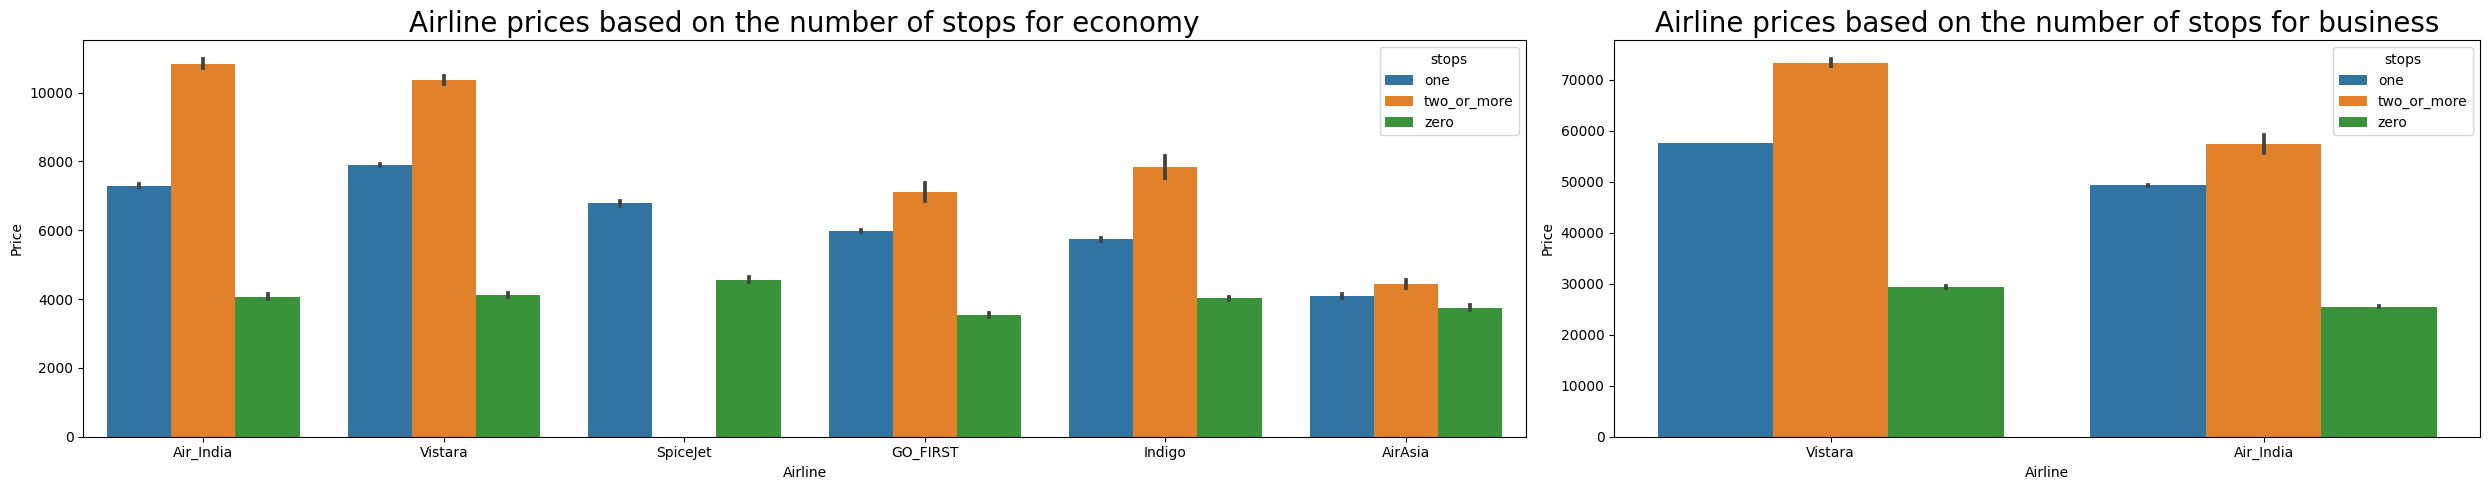

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_airline_prices_stops(data, ticket_class, ax):
    filtered_data = data.loc[data["class"] == ticket_class].sort_values("price", ascending=False)
    sns.barplot(y="price", x="airline", hue="stops", data=filtered_data, ax=ax)
    ax.set_title(f"Airline prices based on the number of stops for {ticket_class.lower()}", fontsize=20)
    ax.set_xlabel('Airline')
    ax.set_ylabel('Price')

fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

plot_airline_prices_stops(flightdf, 'Economy', axs[0])
plot_airline_prices_stops(flightdf, 'Business', axs[1])

plt.tight_layout()
plt.show()


# Data Transformation

#### We are using Label encoding to transform Categorical variables into numerical values.

In [20]:
#import the LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
with open("encoder", "wb") as file:
    pickle.dump(le, file)

features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Copy the DataFrame
flightdf_orginal = flightdf.copy()

# Apply label encoding to the specified columns
flightdf[features] = flightdf[features].apply(le.fit_transform)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [21]:
flightdf

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [22]:
flightdf.dtypes

airline               int64
flight                int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

# Feature selection

### Heatmap to study the correlation of the features  

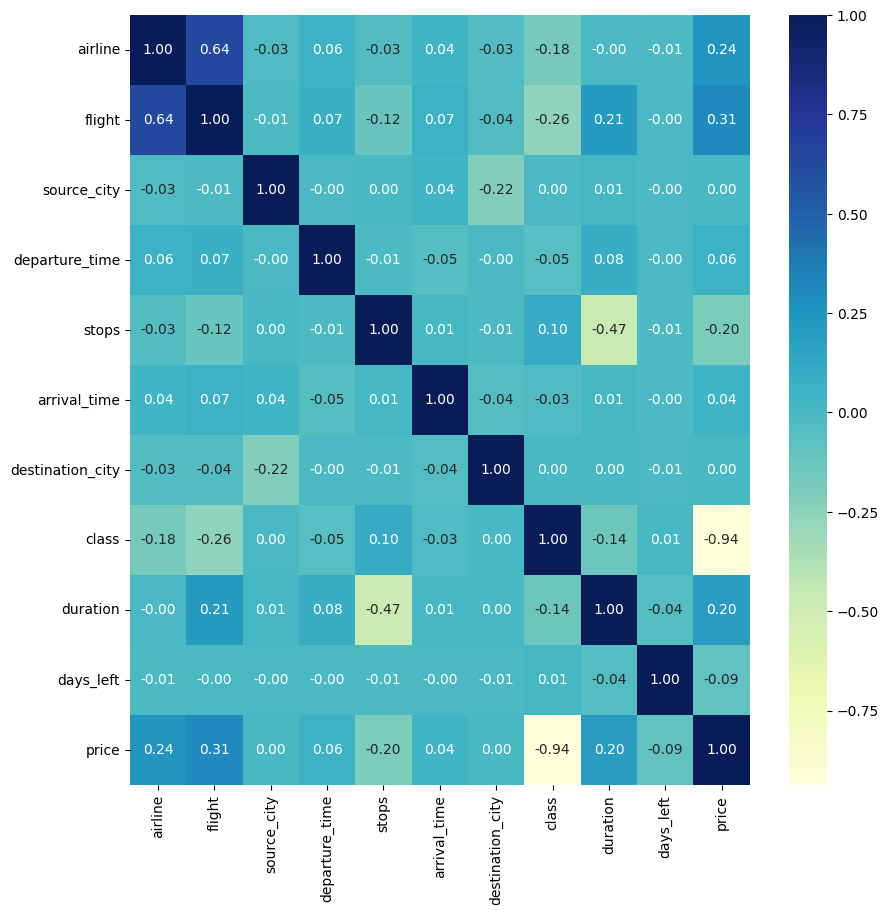

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(flightdf.corr(), annot = True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [24]:
flightdf.drop('flight', axis = 1, inplace= True)

Since we have mostly categorical Input variable and continuous Target variable, we are using SelectKBest and selected the 6 most important features

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  # Use appropriate test for regression

X = flightdf.drop('price', axis=1)
Y = flightdf['price']

k_best = SelectKBest(score_func=f_regression, k=6)  # Select top 6 features
fit = k_best.fit(X, Y)

selected_features = X.columns[fit.get_support()]
print("Selected features:", selected_features)

# Selected features' data
selected_data = X[selected_features]
print(selected_data.head())


Selected features: Index(['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left'], dtype='object')
   airline  departure_time  stops  class  duration  days_left
0        4               2      2      1      2.17          1
1        4               1      2      1      2.33          1
2        0               1      2      1      2.17          1
3        5               4      2      1      2.25          1
4        5               4      2      1      2.33          1


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

In [26]:
# Droping the unselected features 
features_to_drop = [col for col in flightdf.columns if col not in selected_features and col != 'price']
flightdf.drop(features_to_drop, axis=1, inplace=True)
flightdf

,airline,departure_time,stops,class,duration,days_left,price
0,4,2,2,1,2.17,1,5953
1,4,1,2,1,2.33,1,5953
2,0,1,2,1,2.17,1,5956
3,5,4,2,1,2.25,1,5955
4,5,4,2,1,2.33,1,5955
...,...,...,...,...,...,...,...
300148,5,4,0,0,10.08,49,69265
300149,5,0,0,0,10.42,49,77105
300150,5,1,0,0,13.83,49,79099
300151,5,1,0,0,10.00,49,81585


# Data Preprocessing

## Scaling of variables: MIN-MAX Normalization

In [27]:

#The fit_transform method of the MinMaxScaler scales the data within the specified range (0 to 1 by default) for each of the selected columns.

from sklearn.preprocessing import MinMaxScaler

# Custom new minimum and maximum values
new_min = 0
new_max = 1  # Set your desired maximum value




### Scaling all the variables including the categorical

In [28]:
#Scaling all the varaibles including the categorical ones. 

# Create the MinMaxScaler with all the  feature_range 
scaler = MinMaxScaler(feature_range=(new_min, new_max))

scale_cols = ['airline', 'departure_time', 'stops', 'class', 'duration', 'days_left','price']

 # Apply min-max scaling to the specified columns in flightdf
flightdf[scale_cols] = scaler.fit_transform(flightdf[scale_cols])
with open("scaler", "wb") as file:
    pickle.dump(scaler, file)

 # Display the scaled DataFrame
flightdf


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

,airline,departure_time,stops,class,duration,days_left,price
0,0.8,0.4,1.0,1.0,0.027347,0.0,0.039749
1,0.8,0.2,1.0,1.0,0.030612,0.0,0.039749
2,0.0,0.2,1.0,1.0,0.027347,0.0,0.039773
3,1.0,0.8,1.0,1.0,0.028980,0.0,0.039765
4,1.0,0.8,1.0,1.0,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...
300148,1.0,0.8,0.0,0.0,0.188776,1.0,0.558844
300149,1.0,0.0,0.0,0.0,0.195714,1.0,0.623124
300150,1.0,0.2,0.0,0.0,0.265306,1.0,0.639473
300151,1.0,0.2,0.0,0.0,0.187143,1.0,0.659856


### Numerical Variable Scaling

In [29]:
 # Create the MinMaxScaler with custom feature_range(numerical only)
scaler = MinMaxScaler(feature_range=(new_min, new_max))

 # List of numerical columns to scale
num_cols = ['duration', 'days_left', 'price']

 # Apply min-max scaling to the specified columns in flightdf
flightdf[num_cols] = scaler.fit_transform(flightdf[num_cols])

 # Display the scaled DataFrame
flightdf

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

,airline,departure_time,stops,class,duration,days_left,price
0,0.8,0.4,1.0,1.0,0.027347,0.0,0.039749
1,0.8,0.2,1.0,1.0,0.030612,0.0,0.039749
2,0.0,0.2,1.0,1.0,0.027347,0.0,0.039773
3,1.0,0.8,1.0,1.0,0.028980,0.0,0.039765
4,1.0,0.8,1.0,1.0,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...
300148,1.0,0.8,0.0,0.0,0.188776,1.0,0.558844
300149,1.0,0.0,0.0,0.0,0.195714,1.0,0.623124
300150,1.0,0.2,0.0,0.0,0.265306,1.0,0.639473
300151,1.0,0.2,0.0,0.0,0.187143,1.0,0.659856


# Model Training

#### Splitting of input and target variables

In [30]:
Y = flightdf["price"]
X = flightdf.drop(["price"], axis=1)

#### Splitting dataset for modeling

In [31]:
from sklearn.model_selection import train_test_split
import pickle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

### Model 1 - Linear Regression

In [32]:
# model building
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model = lr_model.fit(X_train,Y_train) #training the algorithm

# Save the model to a file
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

#Predict prices using Linear regression model
lrm_Y_pred = lr_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

In [33]:
#To retrieve the intercept:
print(lr_model.intercept_)

#For retrieving the slope:
print(lr_model.coef_)

0.4149578625357494
[ 0.03918199  0.001064   -0.05372867 -0.36552514  0.0379644  -0.05186838]


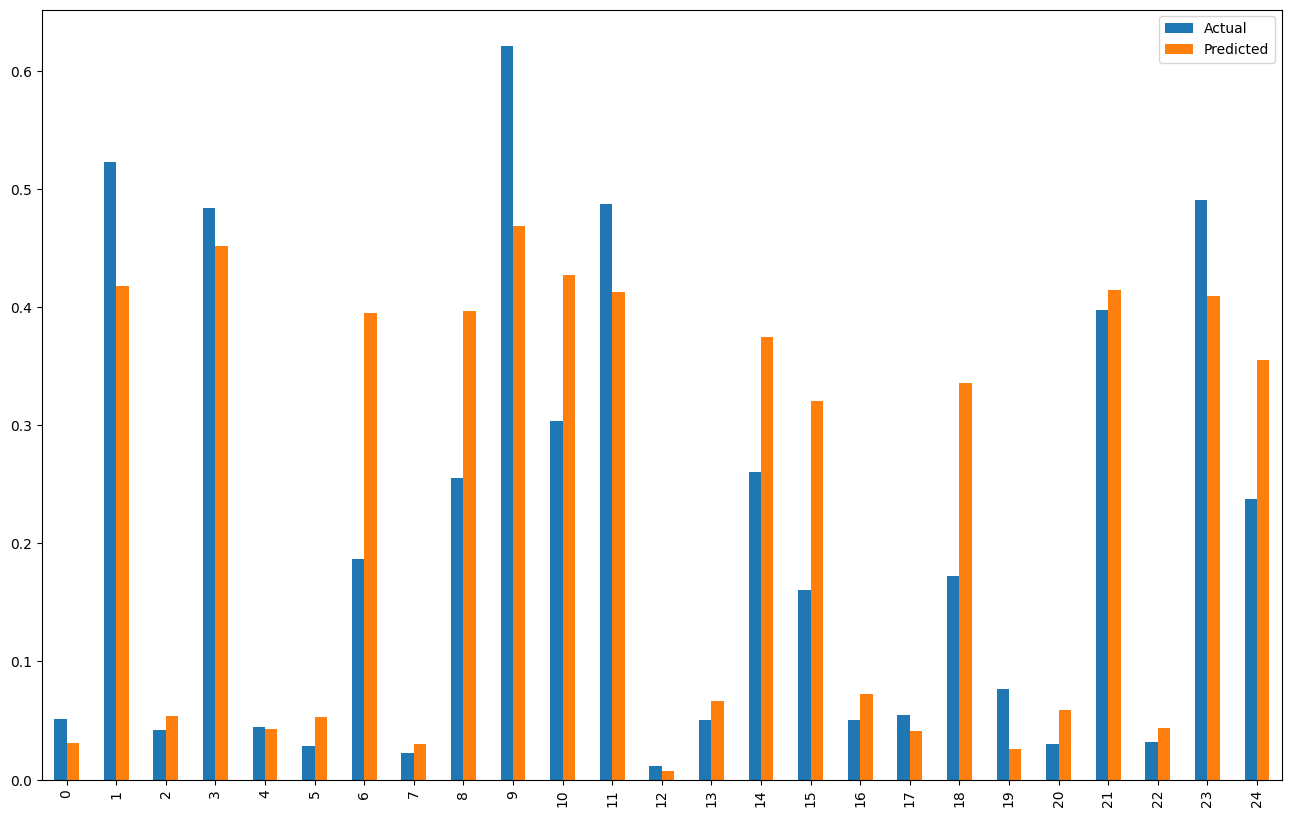

In [34]:
df_lrm = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': lrm_Y_pred.flatten()})


df1 = df_lrm.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
MSE_LR = mean_squared_error(Y_test, lrm_Y_pred)
RMSE_LR = np.sqrt(MSE_LR)
MAE_LR = mean_absolute_error(Y_test, lrm_Y_pred)
R2_LR = r2_score(Y_test, lrm_Y_pred)

# Print metrics
print("MSE:", MSE_LR)
print("RMSE:", RMSE_LR)
print("MAE:", MAE_LR)
print("R2 Score:", R2_LR)


MSE: 0.0033100032850158913
RMSE: 0.057532628003732725
MAE: 0.03789834647589575
R2 Score: 0.9043290504276096


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp


### Model 2 - Decision Tree Regressor



In [36]:
from sklearn import datasets

from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model

dtr_model = DecisionTreeRegressor(criterion='friedman_mse',     # Initialize and fit regressor,The criterion parameter specifies the function that the decision tree algorithm will use to measure the quality of a split during the tree-building process. In this case, 'mse' stands for Mean Squared Error, which is a common criterion for regression problems. It measures the average squared difference between the actual target values and the predicted values. The decision tree algorithm tries to minimize this error when splitting the data.
                             max_depth=3)          #max_depth=3: The max_depth parameter defines the maximum depth of the decision tree. It limits the number of levels (or layers) in the tree. A smaller value, like 3, means that the tree will be relatively shallow, which can help prevent overfitting. Overfitting occurs when a model captures noise in the training data, making it perform poorly on new, unseen data. Setting max_depth can control the complexity of the tree.       

dtr_model = dtr_model.fit(X_train, Y_train)

# Save the model to a file
with open('dtr_model.pkl', 'wb') as file:
    pickle.dump(dtr_model, file)
    
dtr_Y_pred = dtr_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

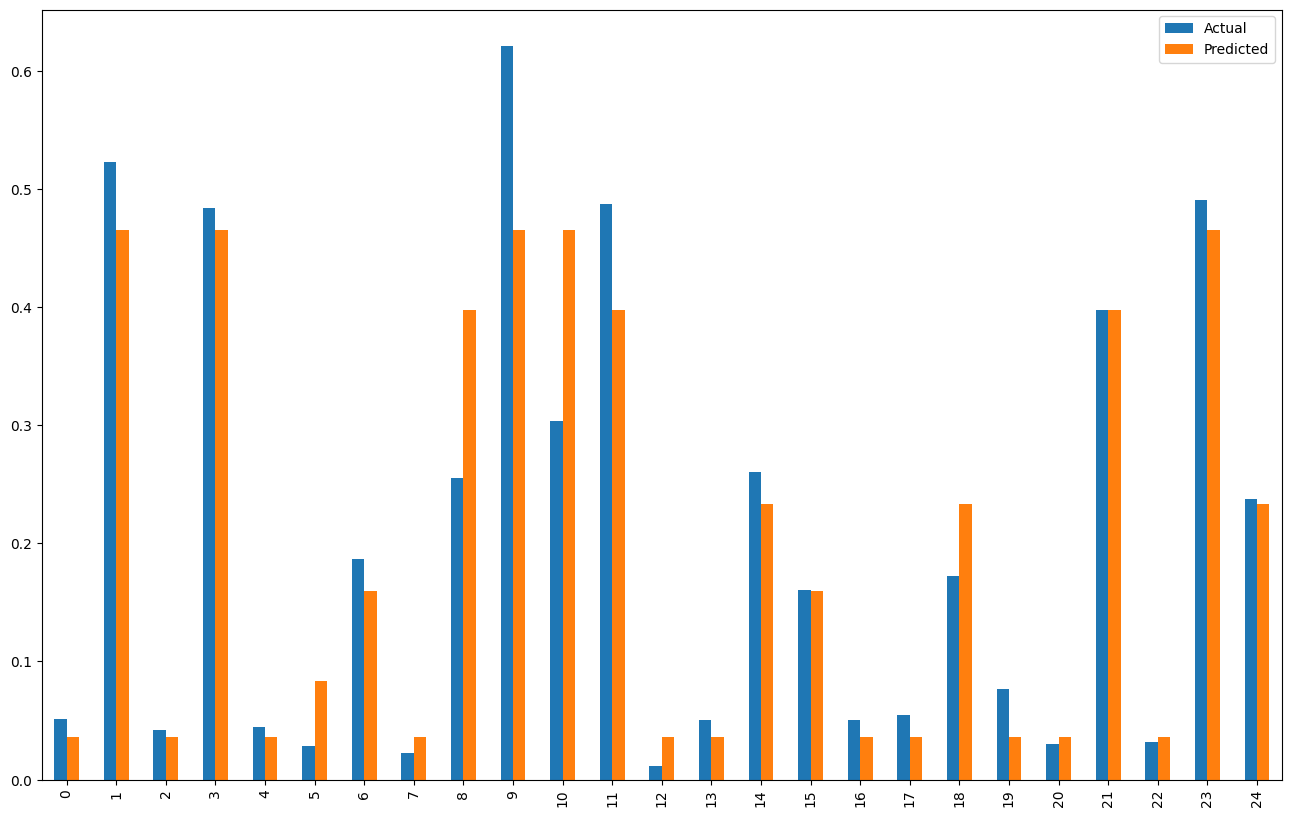

In [37]:
df_dtr = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': dtr_Y_pred.flatten()})

df2 = df_dtr.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
MSE_DTR = mean_squared_error(Y_test, dtr_Y_pred)
RMSE_DTR = np.sqrt(MSE_LR)
MAE_DTR = mean_absolute_error(Y_test, dtr_Y_pred)
R2_DTR = r2_score(Y_test, dtr_Y_pred)

# Print metrics
print("MSE:", MSE_DTR)
print("RMSE:", RMSE_DTR)
print("MAE:", MAE_DTR)
print("R2 Score:", R2_DTR)


MSE: 0.0022710801418478217
RMSE: 0.057532628003732725
MAE: 0.028657066169661065
R2 Score: 0.9343576501240429


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

### Model 3 - Random Forest Regressor

In [39]:
 #creating object for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators= 50, random_state= 0) 
rfr_model = rfr_model.fit(X_train,Y_train) 

# Save the model to a file
with open('rfr_model.pkl', 'wb') as file:
    pickle.dump(rfr_model, file)
    
rfr_Y_pred = rfr_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

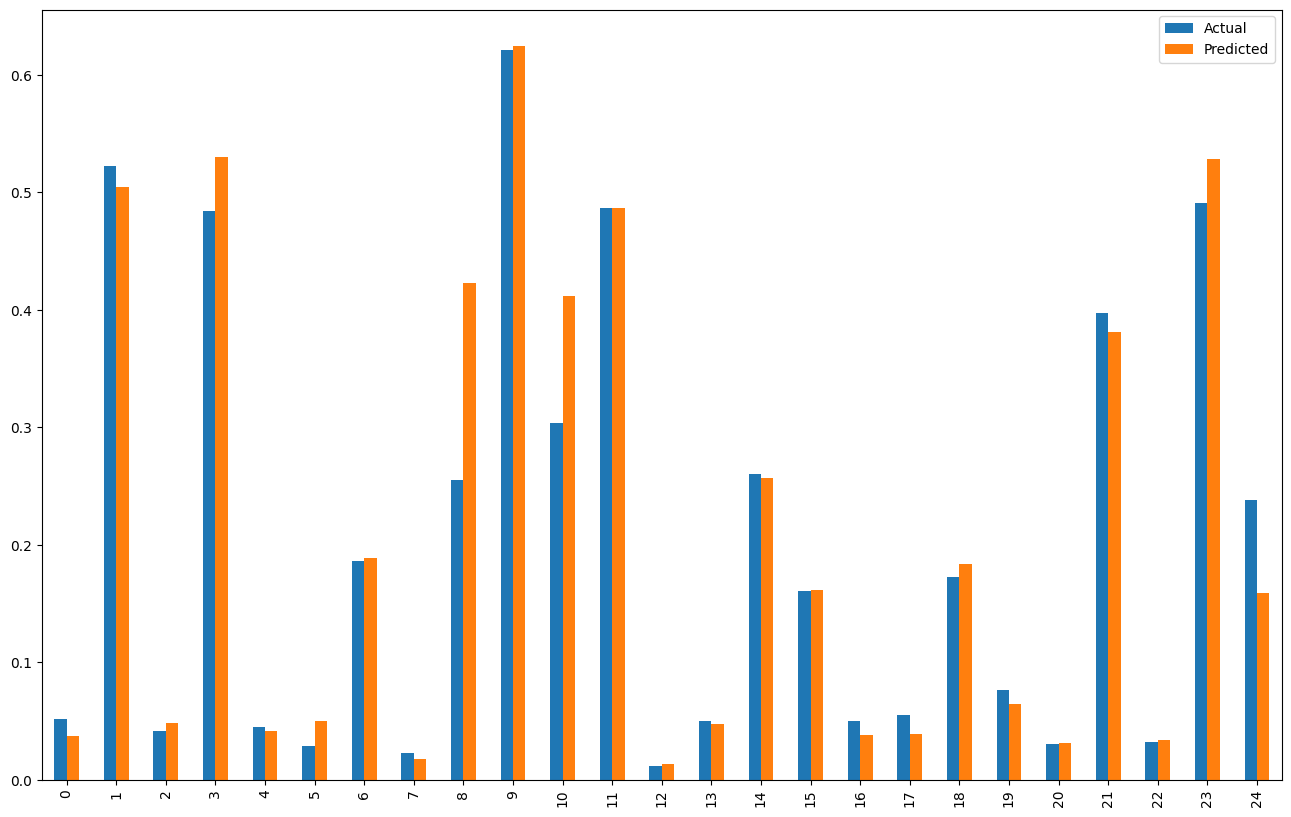

In [40]:
df_rfr = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': rfr_Y_pred.flatten()})



df3 = df_rfr.head(25)
df3.plot(kind='bar',figsize=(16,10))
plt.show()


In [41]:
# Calculate metrics
MSE_RFR = mean_squared_error(Y_test, rfr_Y_pred)
RMSE_RFR = np.sqrt(MSE_RFR)
MAE_RFR = mean_absolute_error(Y_test, rfr_Y_pred)
R2_RFR = r2_score(Y_test, rfr_Y_pred)

# Print metrics
print("MSE:", MSE_RFR)
print("RMSE:", RMSE_RFR)
print("MAE:", MAE_RFR)
print("R2 Score:", R2_RFR)

MSE: 0.0017495168857788615
RMSE: 0.04182722660873969
MAE: 0.021824232214934333
R2 Score: 0.9494326961809673


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

### Model 4 XGBRegressor

In [42]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
import xgboost
from xgboost import XGBRegressor

# Create an XGBRegressor model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model = xgb_model.fit(X_train,Y_train)

# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
    
xgb_Y_pred = xgb_model.predict(X_test)

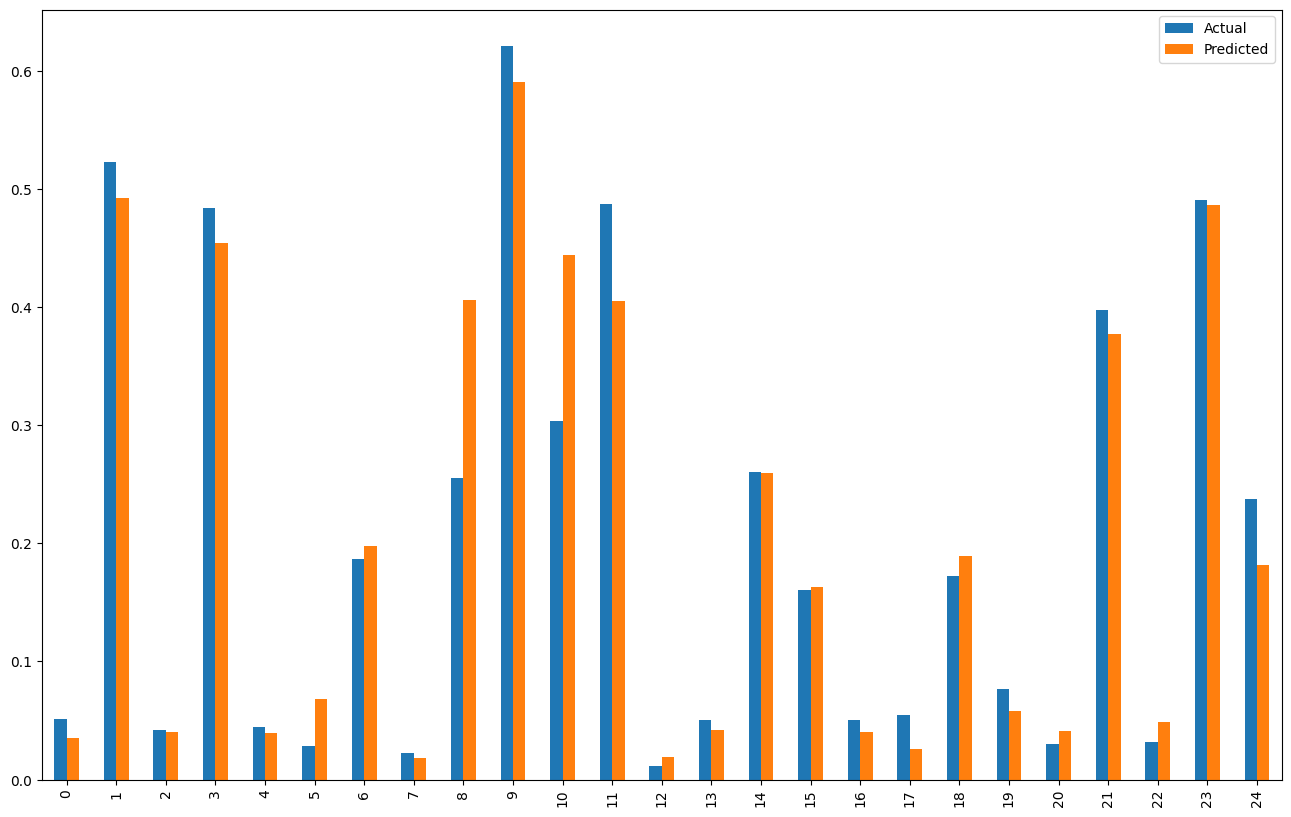

In [44]:
df_xgb = pd.DataFrame({'Actual': Y_test.to_numpy().flatten(), 'Predicted': xgb_Y_pred.flatten()})
df1 = df_xgb.head(25)
df1.plot(kind='bar',figsize=(16,10))

plt.show()

In [45]:
# Calculate metrics
MSE_XGB = mean_squared_error(Y_test, xgb_Y_pred)
RMSE_XGB = np.sqrt(MSE_XGB)
MAE_XGB = mean_absolute_error(Y_test, xgb_Y_pred)
R2_XGB = r2_score(Y_test, xgb_Y_pred)

# Print metrics
print("MSE:", MSE_XGB)
print("RMSE:", RMSE_XGB)
print("MAE:", MAE_XGB)
print("R2 Score:", R2_XGB)

MSE: 0.0016194296540481025
RMSE: 0.04024213779172402
MAE: 0.02322189318009011
R2 Score: 0.953192683079852


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

# Model Evaluation

In [46]:


# Define the models and their results
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBRegressor"]
metrics = {
    "MSE": [MSE_LR, MSE_DTR, MSE_RFR, MSE_XGB ],
    "RMSE": [RMSE_LR, RMSE_DTR, RMSE_RFR, RMSE_XGB ],
    "MAE": [MAE_LR, MAE_DTR, MAE_RFR, MAE_XGB ],
    "R Squared": [R2_LR, R2_DTR, R2_RFR, R2_XGB ]
}

# Create a DataFrame to display the results
results = pd.DataFrame(metrics, index=models)

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results.min().min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results


/tmp/ipykernel_47/3209915935.py:24: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_results = results.style.applymap(highlight_min_max)


,MSE,RMSE,MAE,R Squared
Linear Regression,0.003310,0.057533,0.037898,0.904329
Decision Tree Regressor,0.002271,0.057533,0.028657,0.934358
Random Forest Regressor,0.001750,0.041827,0.021824,0.949433
XGBRegressor,0.001619,0.040242,0.023222,0.953193


Using ensembling techniques, averaging the prediction by all models

In [47]:
y_pred_ensemble = (lrm_Y_pred + dtr_Y_pred + rfr_Y_pred + xgb_Y_pred) / 4  # Adjust the denominator based on the number of models


In [48]:
results_df = pd.concat([X_test.reset_index(drop=True), Y_test.reset_index(drop=True), 
                        pd.Series(y_pred_ensemble, name='Predicted Price(Avg pred)'), 
                                  pd.Series(xgb_Y_pred, name='Predicted Price(XGB pred)')], axis=1)

# Display the first 10 rows of the results
print(results_df.head(10))

   airline  departure_time  stops  class  duration  days_left     price  \
0      0.2             0.8    0.0    1.0  0.386122   0.812500  0.051334   
1      1.0             0.8    0.0    0.0  0.183673   0.854167  0.522490   
2      1.0             0.8    0.0    1.0  0.197347   0.833333  0.041733   
3      1.0             1.0    0.0    0.0  0.278980   0.270833  0.484192   
4      0.2             0.0    0.0    1.0  0.151429   0.395833  0.044873   
5      0.0             0.2    0.0    1.0  0.204082   0.083333  0.028287   
6      1.0             0.0    1.0    0.0  0.023878   0.125000  0.186388   
7      0.6             0.2    0.0    1.0  0.141224   0.937500  0.022588   
8      0.2             1.0    0.0    0.0  0.520408   0.895833  0.255194   
9      1.0             1.0    0.0    0.0  0.394694   0.020833  0.620960   

   Predicted Price(Avg pred)  Predicted Price(XGB pred)  
0                   0.034550                   0.034822  
1                   0.470153                   0.492235  
